In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

We use the Iris dataset which contains 150 samples of iris flowers categorized into 3 species.

Each sample has 4 features:  
- Sepal length, Sepal width, Petal length, Petal width


In [4]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

**Split Dataset**

We split the dataset into:
- 80% training data
- 20% testing data

Stratification ensures all 3 classes are represented proportionally in both sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

**Train KNN Classifier**

We train the K-Nearest Neighbors model with `K=3`.

KNN is a **lazy learning** algorithm:
- It stores all training data.
- For prediction, it finds the **K closest neighbors** using distance (usually Euclidean).
- The predicted class is based on **majority voting** among neighbors.

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Evaluate Model**

We predict on the test set and evaluate using:
- Accuracy
- Precision, Recall, and F1-score per class

This gives us a well-rounded view of model performance.

In [7]:
y_pred = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Visualize Confusion Matrix**

The confusion matrix shows which classes were predicted correctly and where errors occurred.

Perfect classification results in values only on the diagonal.

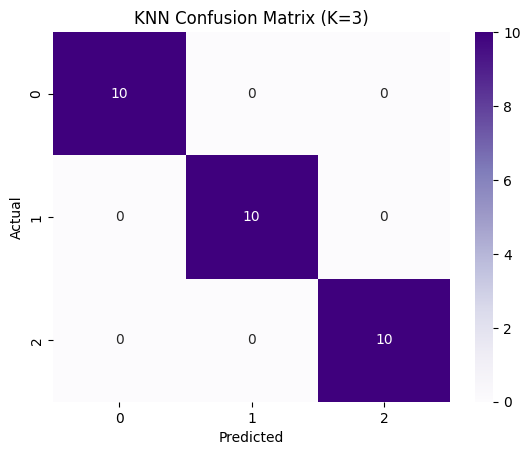

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("KNN Confusion Matrix (K=3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Accuracy vs. K Plot**

We check model accuracy for different values of **K (1 to 10)**.

- Low K (e.g., 1) can overfit.
- High K can underfit.
- This plot helps us find the best balance.

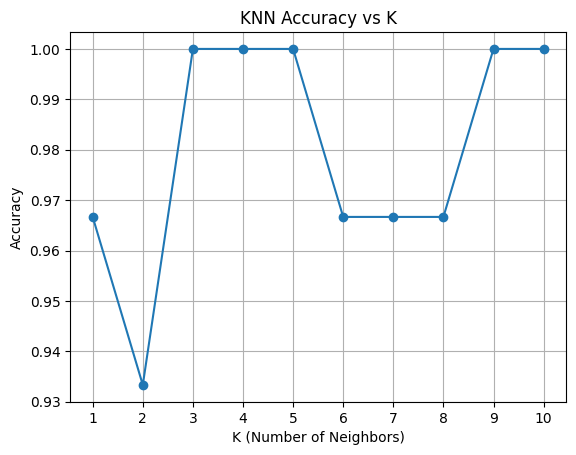

In [9]:
accuracies = []
k_range = range(1, 11)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_k_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_k_pred))

plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

**Conclusion:**

- KNN is **simple and intuitive**, but sensitive to:
  - Feature scaling
  - Irrelevant features
  - Outliers

- It works well for **small to medium-sized datasets**.

- Best practice: Always tune `K` using cross-validation.